# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [8]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


<Axes: >

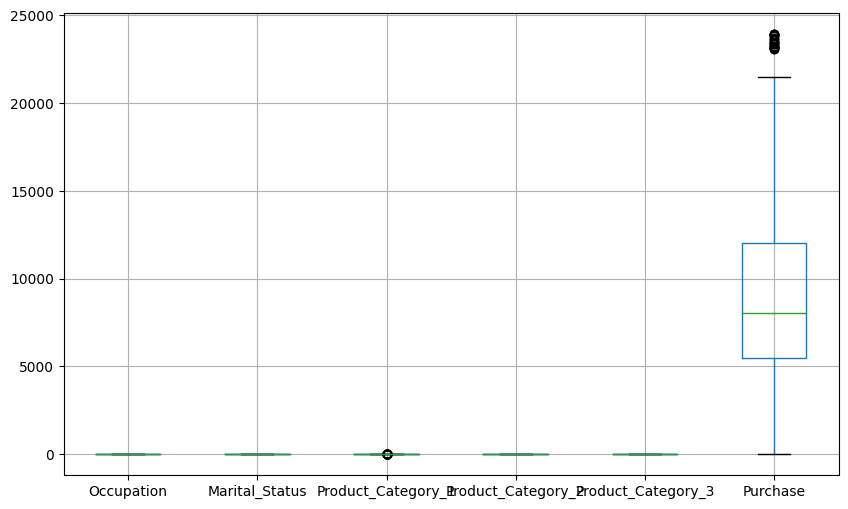

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

df.iloc[:,2:].boxplot()

In [2]:
df.shape

(4998, 12)

## 2. KNN 구현 & 파라미터 튜닝

In [12]:
df['Age'] = df['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [13]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [14]:
df.drop('Product_Category_3', axis = 1, inplace = True)
df.drop('User_ID', axis = 1, inplace = True)
df.drop('Product_ID', axis = 1, inplace = True)

In [16]:
# Feature Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
label_encoder_age = LabelEncoder()
df['Age'] = label_encoder_age.fit_transform(df['Age'])
label_encoder_city = LabelEncoder()
df['City_Category'] = label_encoder_city.fit_transform(df['City_Category'])

In [17]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace = True)

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Train-test split
X = df.drop("Purchase", axis = 1)
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,3,5,17.0
1,0,10,1,7,9.0
2,0,10,1,1,4.0
3,0,10,3,2,4.0
4,0,10,3,3,5.0


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4998 non-null   int64  
 1   Occupation                  4998 non-null   int64  
 2   Stay_In_Current_City_Years  4998 non-null   int64  
 3   Product_Category_1          4998 non-null   int64  
 4   Product_Category_2          4998 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 234.3 KB


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [26]:
def standardization(train, test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test

X_train, X_test = standardization(X_train, X_test)

In [28]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

## 3. Evaluation

In [30]:
y_pred = knn.predict(X_test)

In [29]:
# Evaluating the model
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.53432077593156
Testing accuracy: 0.26578972687375113


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

KNN regression: 
RMSE: 4239.618525131713
R2 score: 0.26578972687375113
